In [3]:
import xarray as xr

# Replace 'your_file_path.nc' with the path to your NetCDF file
ds = xr.open_dataset('Albedo.nc')


In [4]:
ds

<xarray.Dataset>
Dimensions:                (time: 12636, ntb: 2, lat: 13, lon: 21)
Coordinates:
  * time                   (time) datetime64[ns] 2015-01-15T06:00:00 ... 2023...
  * lat                    (lat) float32 24.0 23.75 23.5 ... 21.5 21.25 21.0
  * lon                    (lon) float32 85.0 85.25 85.5 ... 89.5 89.75 90.0
Dimensions without coordinates: ntb
Data variables:
    time_bnds              (time, ntb) datetime64[ns] ...
    valid_date_time_range  (time, ntb) |S10 ...
    ref_date_time          (time) |S10 ...
    forecast_hour          (time) timedelta64[ns] ...
    ALBDO_L1_Avg_1         (time, lat, lon) float32 ...
Attributes:
    Creation date and time:  2023-09-12 05:13:29 -0600
    Conventions:             CF-1.5
    Creator:                 NCAR - CISL RDA (dattore)

In [5]:
albedo_data = ds['ALBDO_L1_Avg_1']


In [6]:
albedo_data

<xarray.DataArray 'ALBDO_L1_Avg_1' (time: 12636, lat: 13, lon: 21)>
[3449628 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-01-15T06:00:00 ... 2023-09-10T18:00:00
  * lat      (lat) float32 24.0 23.75 23.5 23.25 23.0 ... 21.75 21.5 21.25 21.0
  * lon      (lon) float32 85.0 85.25 85.5 85.75 86.0 ... 89.25 89.5 89.75 90.0
Attributes:
    long_name:     Albedo
    units:         %
    level:         Ground or water surface
    cell_methods:  time: mean over hours

In [14]:
df = albedo_data.to_dataframe()


MovieWriter imagemagick unavailable; using Pillow instead.


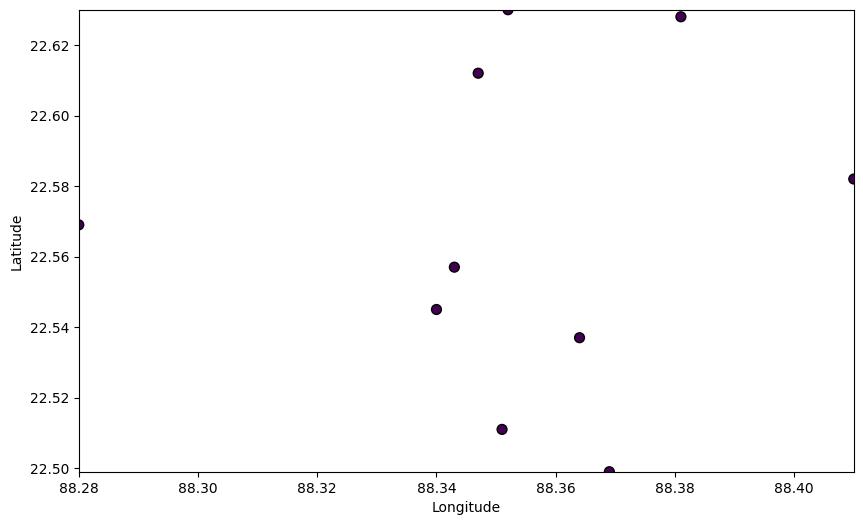

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation

# Assuming 'data' is your DataFrame with columns: 'time', 'lat', 'lon', 'temperature'
# Replace 'your_data.csv' with the actual path or dataframe name
data = pd.read_excel('Combined All Stations_100m+PM25 added preci.xlsx')

# Sort the data by time
data['time'] = pd.to_datetime(data['time'])
data = data.sort_values(by='time')

# Plotting parameters
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(data['lon'].min(), data['lon'].max())
ax.set_ylim(data['lat'].min(), data['lat'].max())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
sc = ax.scatter([], [], c=[], cmap='viridis', s=50, marker='o', edgecolor='k')

# Update function for animation
def update(frame):
    subset = data[data['time'] == frame]
    sc.set_offsets(subset[['lon', 'lat']])
    sc.set_array(subset['PM 2.5'])
    return sc,

# Create animation
animation = FuncAnimation(fig, update, frames=data['time'].unique(), blit=True)

# Save the animation as a GIF
animation.save('temperature_animation.gif', writer='imagemagick', fps=1)
plt.show()
